In [1]:
!pip install fastai --upgrade

     |████████████████████████████████| 194kB 8.5MB/s 
     |████████████████████████████████| 61kB 7.8MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [2]:
!git clone https://github.com/rwightman/pytorch-image-models/

Cloning into 'pytorch-image-models'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 4594 (delta 5), reused 19 (delta 4), pack-reused 4572
Receiving objects: 100% (4594/4594), 15.78 MiB | 26.98 MiB/s, done.
Resolving deltas: 100% (3303/3303), done.


In [3]:
%cd pytorch-image-models

/content/pytorch-image-models


In [4]:
#!wget https://www.dropbox.com/s/cb3g53z4pbtaqvl/erm.zip?dl=1 -O erm.zip
!wget https://unirioja-my.sharepoint.com/:u:/g/personal/magarcd_unirioja_es/ERU6UfU2RGREnYNl_KxSpkkB4NP42bHj6siEIWrQ7aWPAQ?download=1 -O erm.zip

--2021-03-04 15:23:54--  https://unirioja-my.sharepoint.com/:u:/g/personal/magarcd_unirioja_es/ERU6UfU2RGREnYNl_KxSpkkB4NP42bHj6siEIWrQ7aWPAQ?download=1
Resolving unirioja-my.sharepoint.com (unirioja-my.sharepoint.com)... 13.107.136.9
Connecting to unirioja-my.sharepoint.com (unirioja-my.sharepoint.com)|13.107.136.9|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/magarcd_unirioja_es/Documents/erm.zip?originalPath=aHR0cHM6Ly91bmlyaW9qYS1teS5zaGFyZXBvaW50LmNvbS86dTovZy9wZXJzb25hbC9tYWdhcmNkX3VuaXJpb2phX2VzL0VSVTZVZlUyUkdSRW5ZTmxfS3hTcGtrQjROUDQyYkhqNnNpRUlXclE3YVdQQVE_cnRpbWU9a1AxNmhpSGYyRWc [following]
--2021-03-04 15:23:55--  https://unirioja-my.sharepoint.com/personal/magarcd_unirioja_es/Documents/erm.zip?originalPath=aHR0cHM6Ly91bmlyaW9qYS1teS5zaGFyZXBvaW50LmNvbS86dTovZy9wZXJzb25hbC9tYWdhcmNkX3VuaXJpb2phX2VzL0VSVTZVZlUyUkdSRW5ZTmxfS3hTcGtrQjROUDQyYkhqNnNpRUlXclE3YVdQQVE_cnRpbWU9a1AxNmhpSGYyRWc
Reusing existing connection to unirioja-my.sharepo

In [5]:
!unzip erm.zip

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: erm/train/no/anonymized_1873542_fakeB.jpg  
  inflating: erm/train/no/anonymized_887511_fakeB.jpg  
  inflating: erm/train/no/anonymized_1351887_fakeB.jpg  
  inflating: erm/train/no/anonymized_1099051_fakeB.jpg  
  inflating: erm/train/no/anonymized_448602_fakeB.jpg  
  inflating: erm/train/no/anonymized_852019_fakeB.jpg  
  inflating: erm/train/no/anonymized_169973_fakeB.jpg  
  inflating: erm/train/no/anonymized_1241994_fakeB.jpg  
  inflating: erm/train/no/anonymized_1898489_fakeB.jpg  
  inflating: erm/train/no/anonymized_160483_fakeB.jpg  
  inflating: erm/train/no/anonymized_593874_fakeB.jpg  
  inflating: erm/train/no/anonymized_359235_fakeB.jpg  
  inflating: erm/train/no/anonymized_782889_fakeB.jpg  
  inflating: erm/train/no/anonymized_324102_fakeB.jpg  
  inflating: erm/train/no/anonymized_532397_fakeB.jpg  
  inflating: erm/train/no/anonymized_263513_fakeB.jpg  
  inflating: erm/train/no/anonymized_1

In [6]:
from fastai.vision.all import *
import fastai

In [7]:
path = Path('erm/')
trainPath = path/'train'
testPath = path/'test'

In [8]:
def getDataBlock(presize=512,size=384):
    return DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(valid_pct=0.2,seed=42),
                 get_y=parent_label,
                 item_tfms = Resize(presize),
                 batch_tfms=[*aug_transforms(size=size, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])

In [9]:
db512 = getDataBlock()
dls512 = db512.dataloaders(trainPath,bs=4)

In [10]:
from fastai.vision.all import *
callbacks = [
    ShowGraphCallback(),
    EarlyStoppingCallback(patience=3),
    SaveModelCallback(fname='deit384'),
    ReduceLROnPlateau(patience=1)
]

In [11]:
import timm
learn = Learner(dls512,timm.models.vision_transformer.vit_deit_base_patch16_384(num_classes=2,pretrained=True),metrics=accuracy,cbs=callbacks)

Downloading: "https://dl.fbaipublicfiles.com/deit/deit_base_patch16_384-8de9b5d1.pth" to /root/.cache/torch/hub/checkpoints/deit_base_patch16_384-8de9b5d1.pth


SuggestedLRs(lr_min=6.309573450380412e-08, lr_steep=0.005248074419796467)

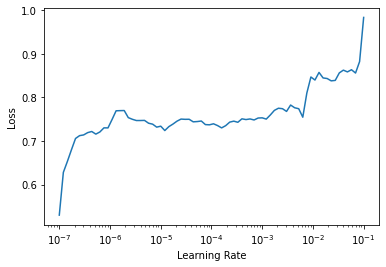

In [ ]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time
0,0.698005,0.693134,0.503438,12:28


Better model found at epoch 0 with valid_loss value: 0.6931341886520386.


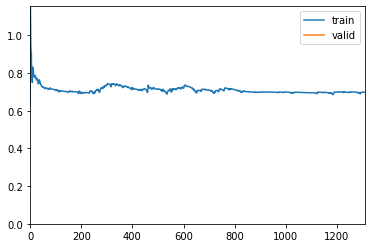

epoch,train_loss,valid_loss,accuracy,time
0,0.693459,0.693137,0.502674,12:32
1,0.692732,0.693172,0.503438,12:31
2,0.693632,0.694756,0.496562,12:31
3,0.694900,0.694936,0.496562,12:31


Better model found at epoch 0 with valid_loss value: 0.6931368708610535.


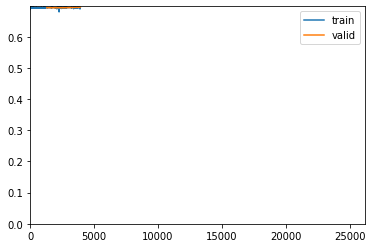

Epoch 1: reducing lr to 1.999307197487535e-05
Epoch 2: reducing lr to 2.999199865755398e-05
No improvement since epoch 0: early stopping


In [12]:
learn.fine_tune(20,base_lr=1e-3)

In [13]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=384, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])
dlsTest = dbTest.dataloaders(path,bs=32)

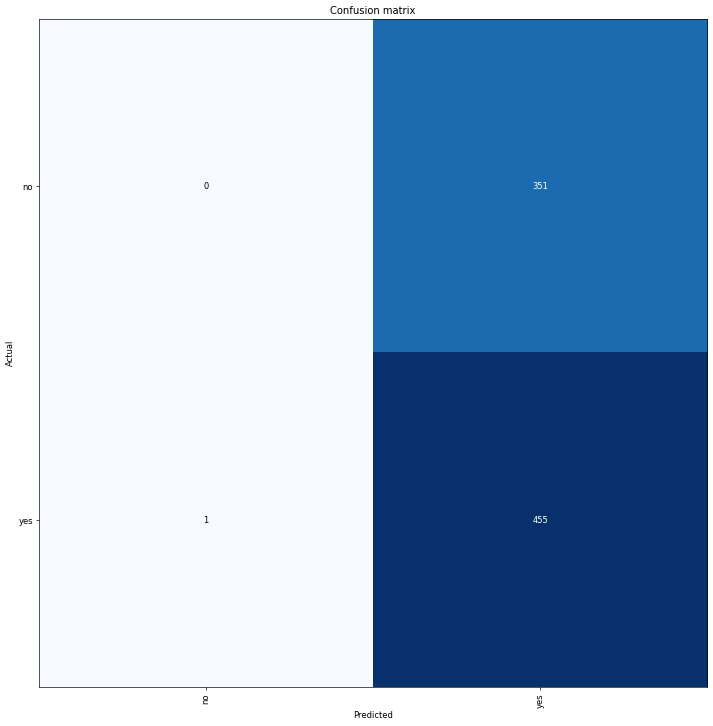

In [14]:
learn.dls = dlsTest
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12),dpi=60)

In [15]:
learn.metrics=[accuracy,Precision(),Recall()]
learn.validate()

Better model found at epoch 0 with valid_loss value: 0.5638166069984436.


(#4) [0.6926881670951843,0.5638166069984436,0.5645161290322581,0.9978070175438597]

In [ ]:
learn.export(fname='DEIT.pkl')